<a href="https://colab.research.google.com/github/judyaboelfetoh/Task11_3/blob/main/Task11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import skimage

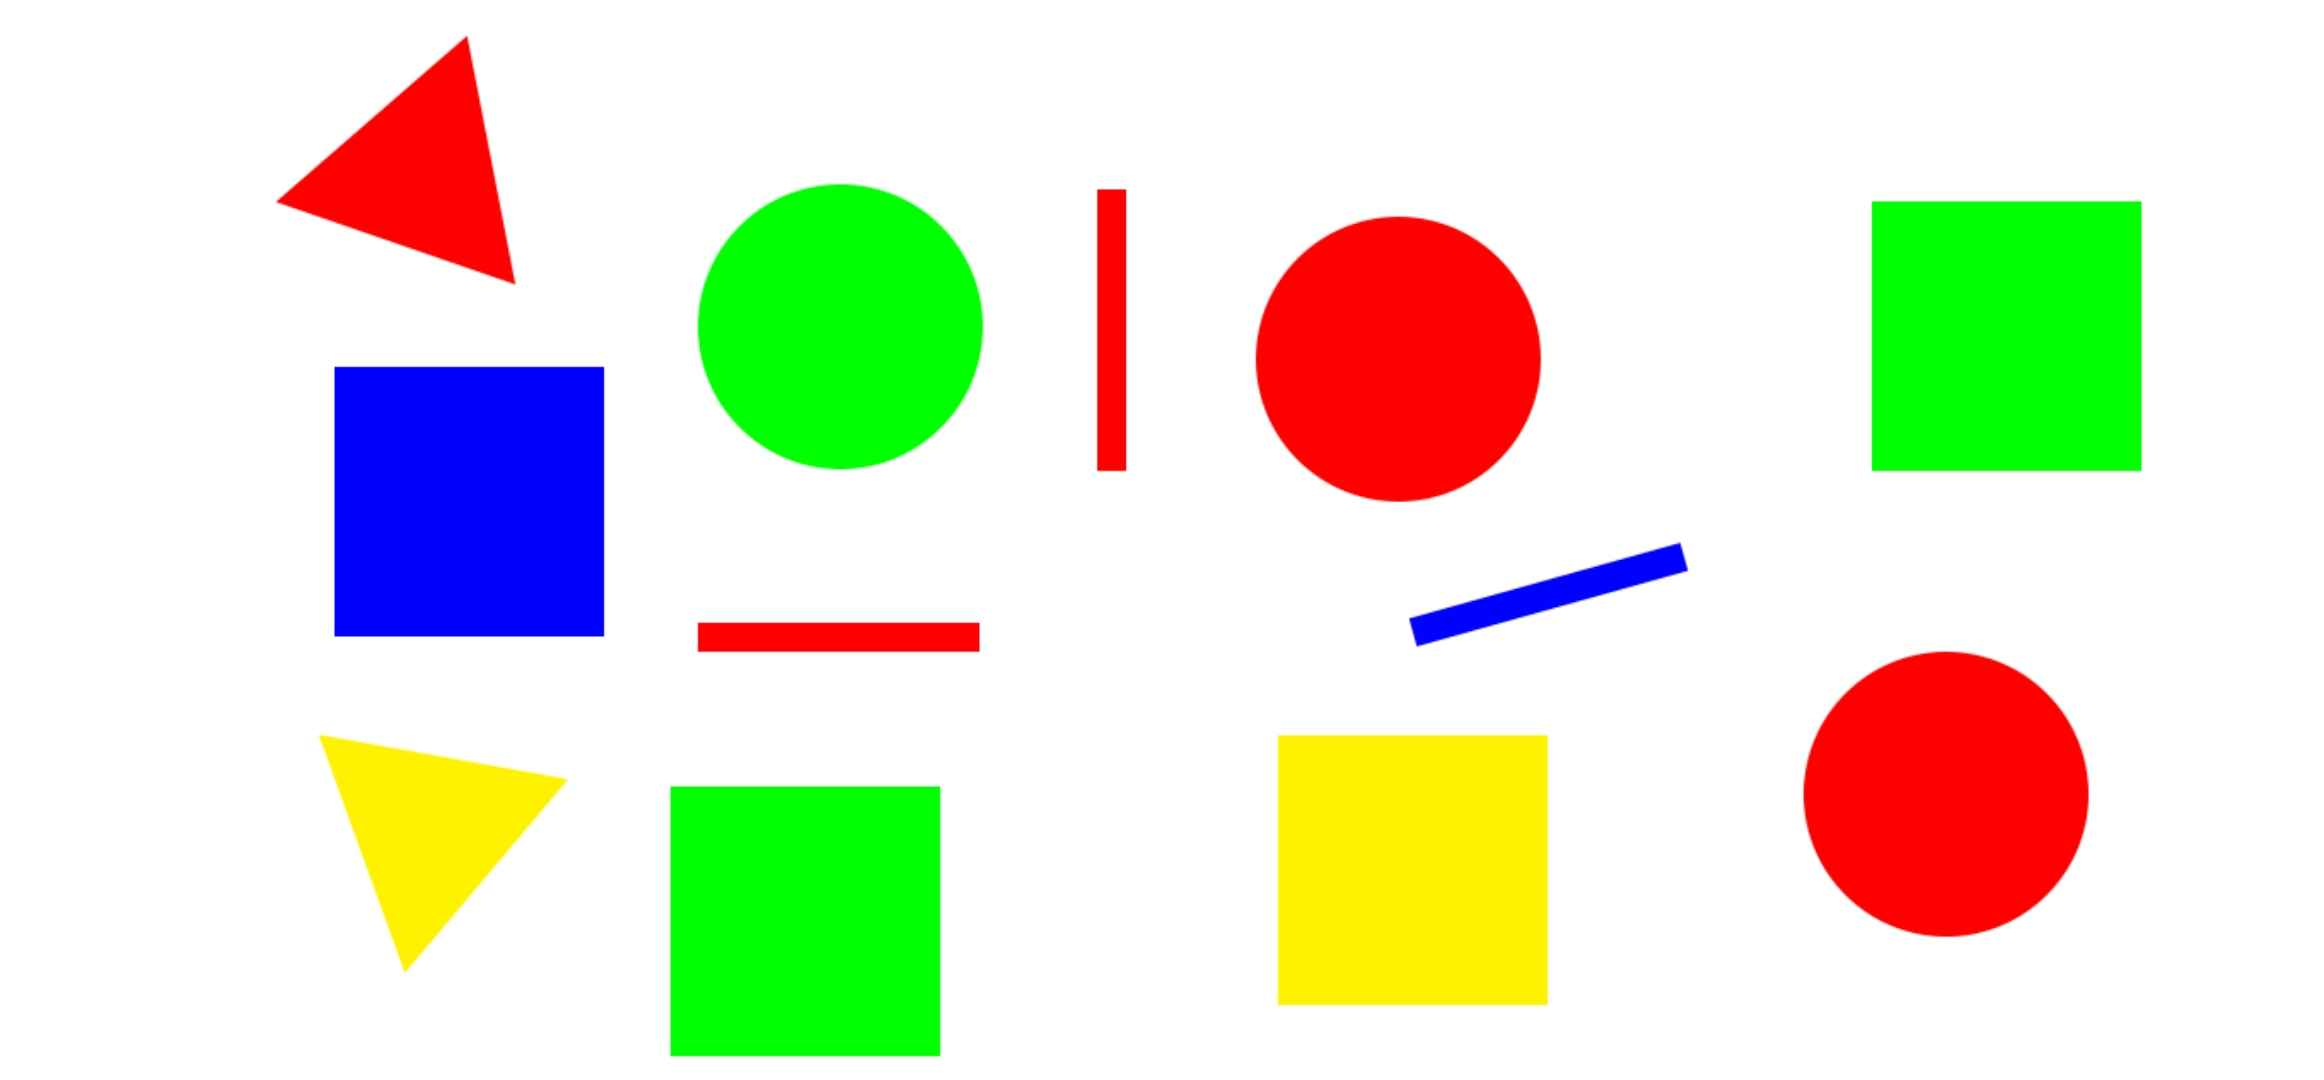

In [3]:
img = cv2.imread('test.jpg')
cv2_imshow(img)

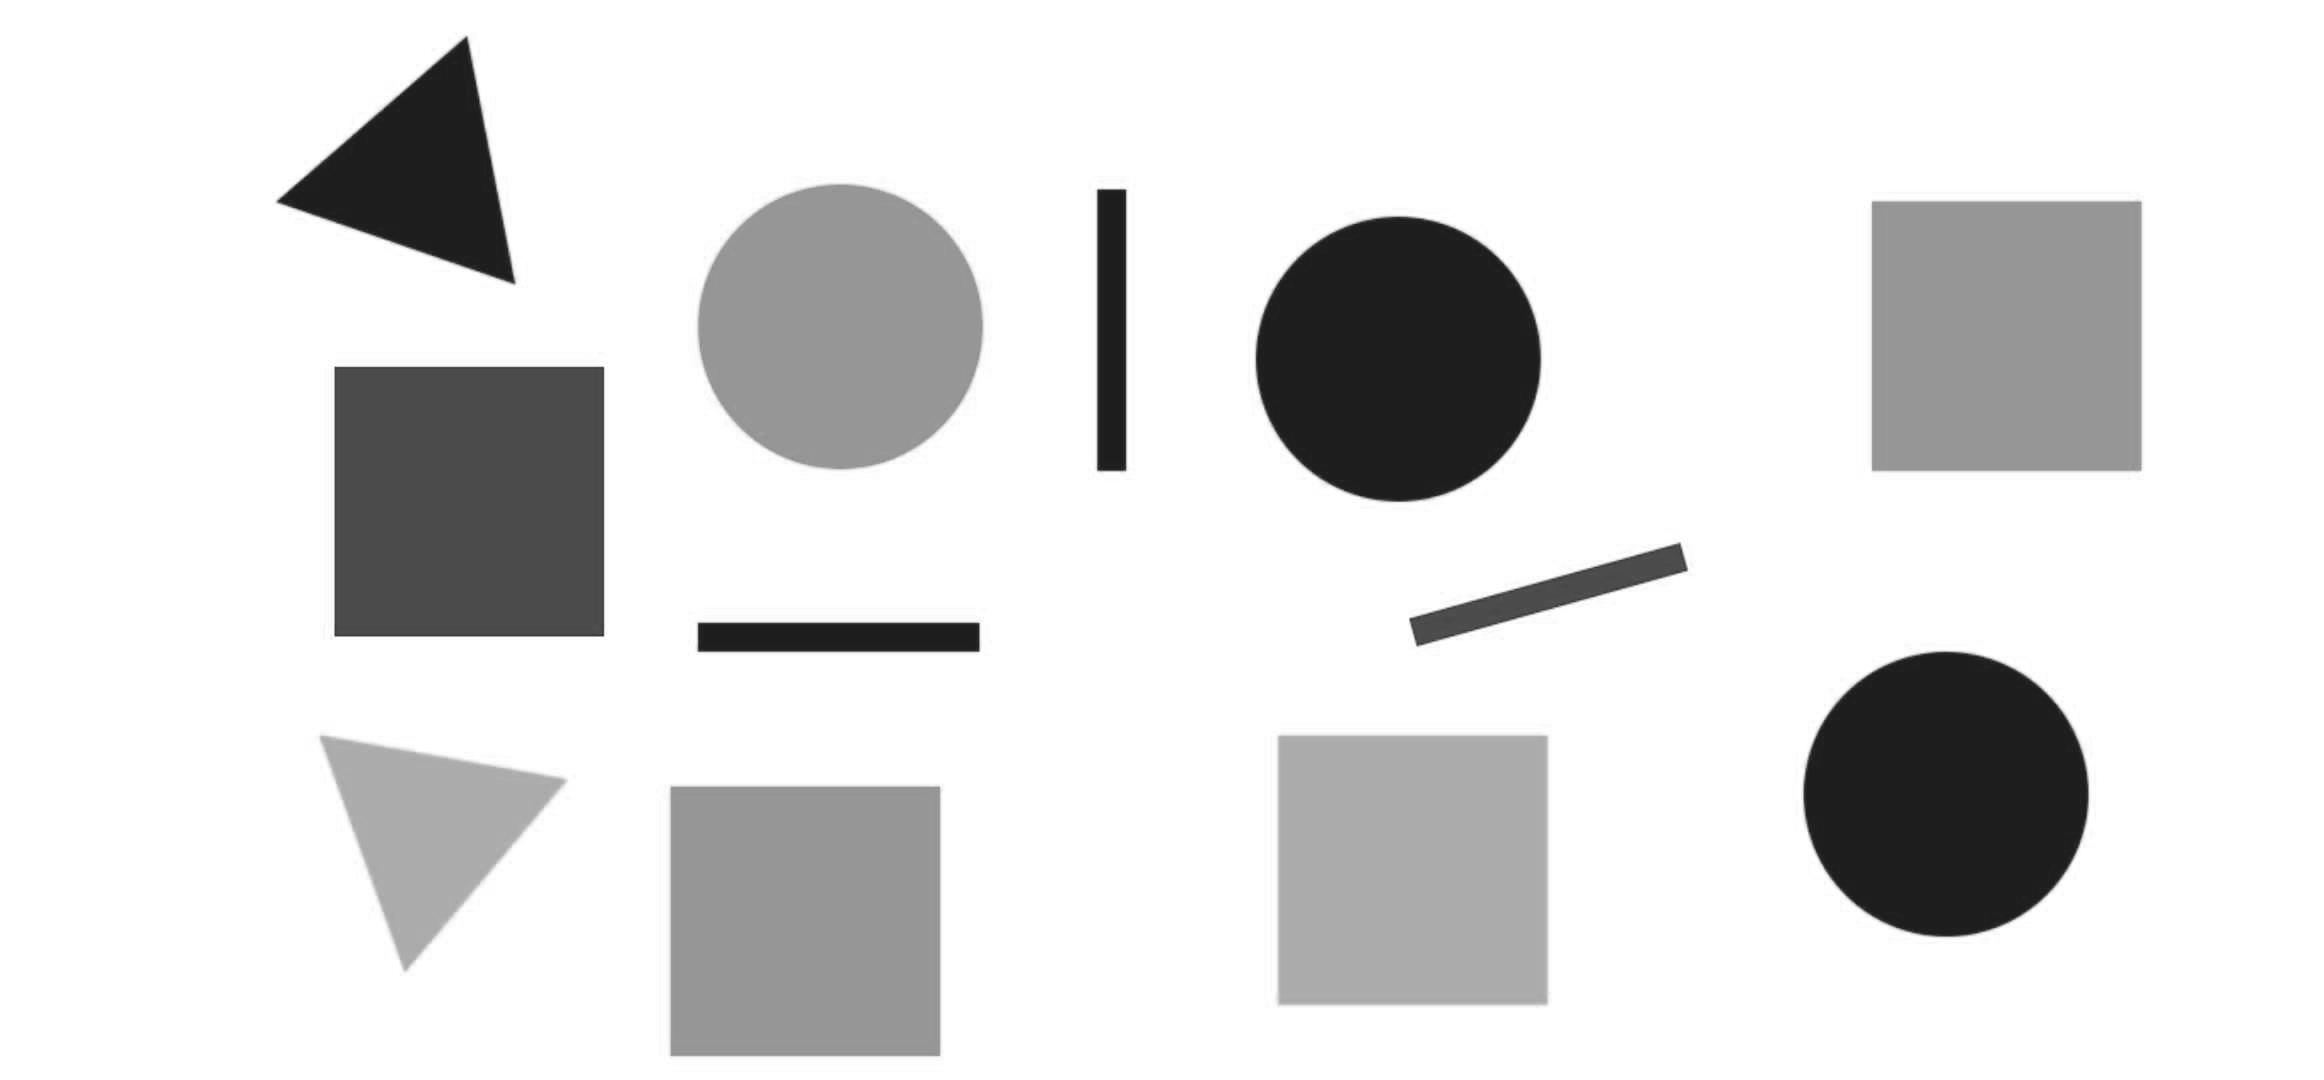

In [4]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_img)

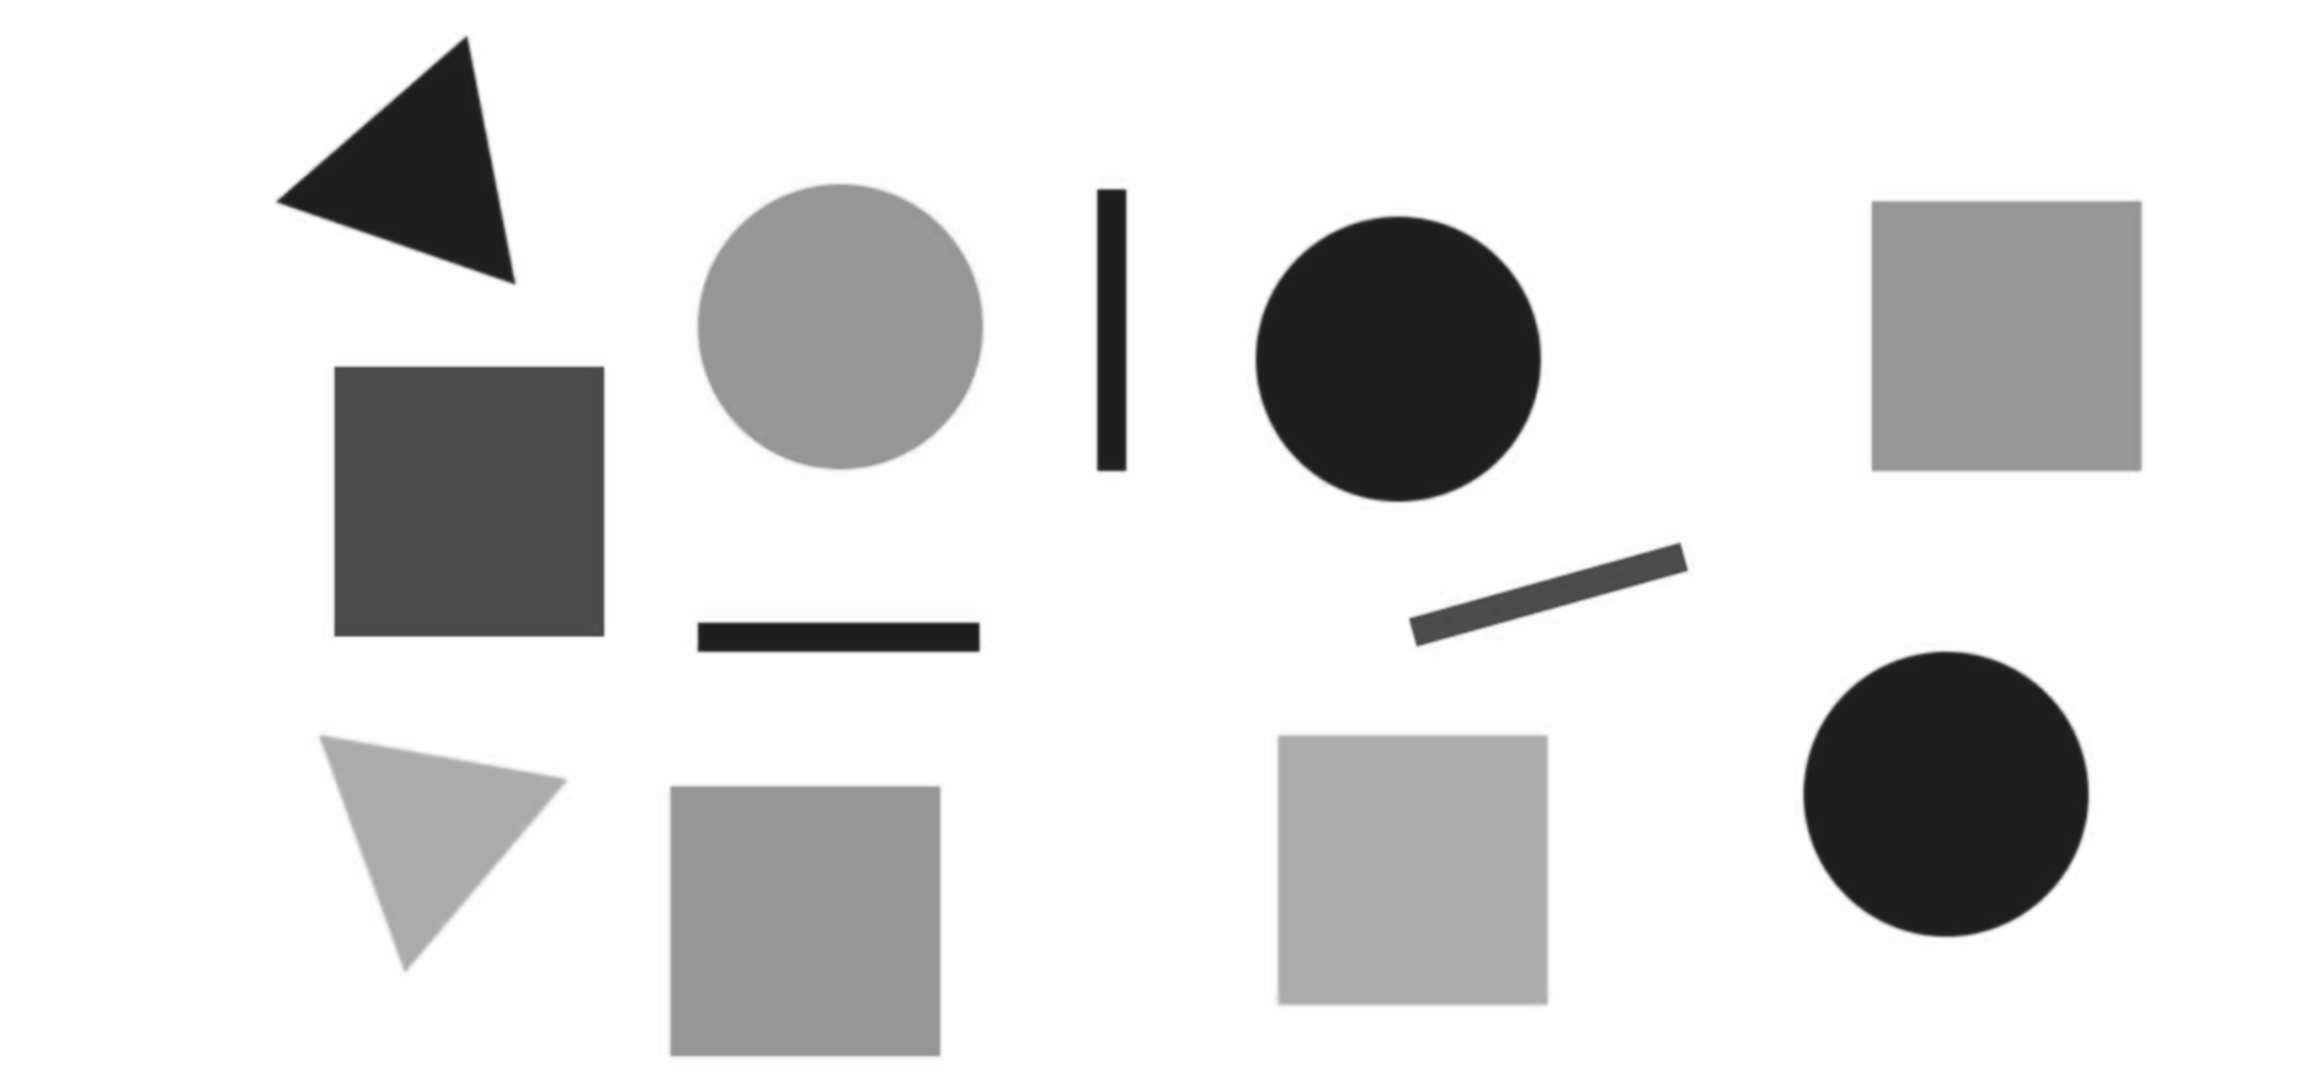

In [5]:
blurred = cv2.GaussianBlur(gray_img, (5, 5), 1)

cv2_imshow(blurred)

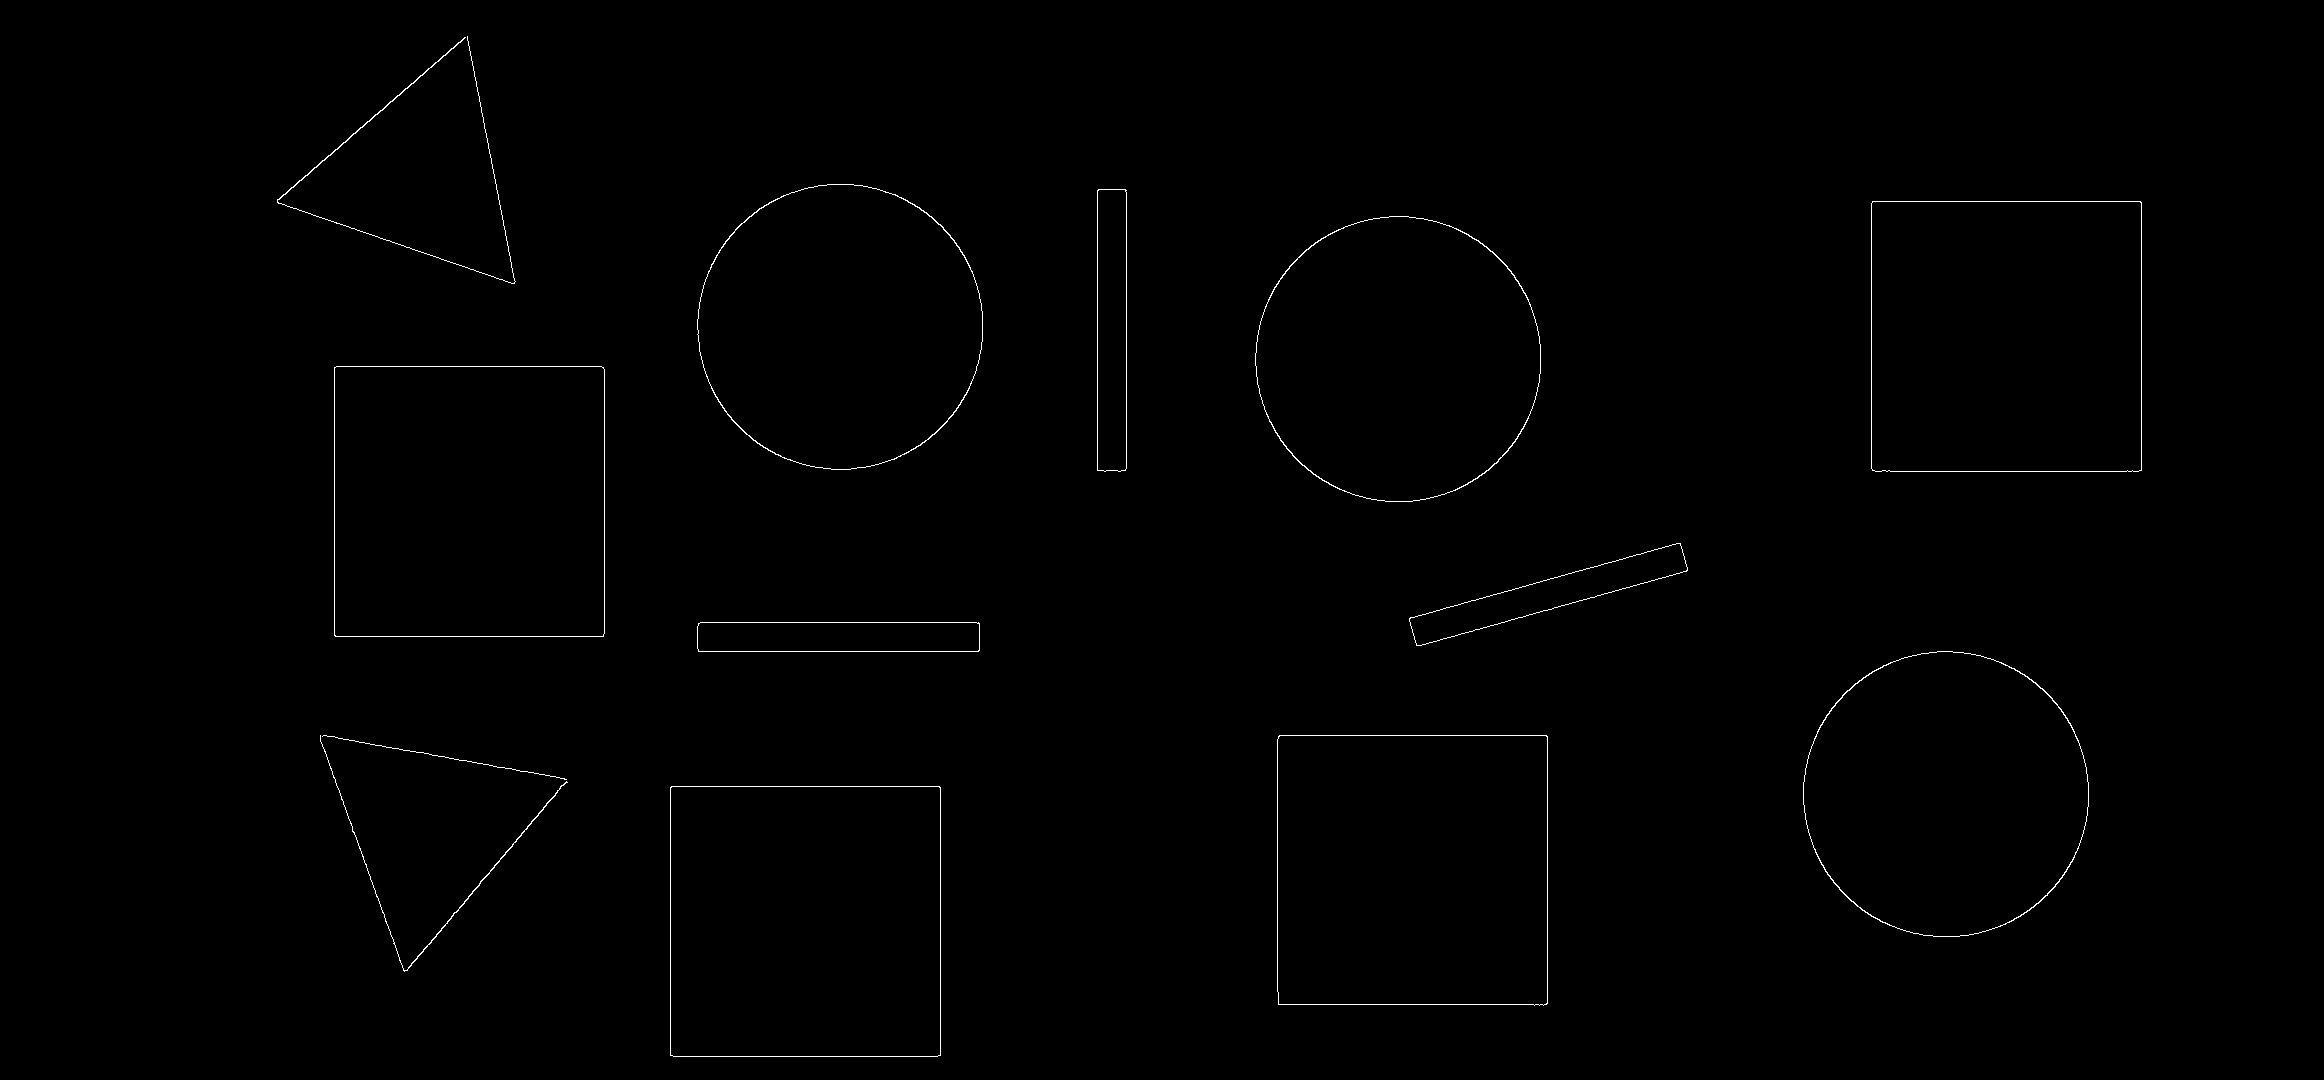

In [6]:
Edges = cv2.Canny(blurred, 100, 150)
cv2_imshow(Edges)

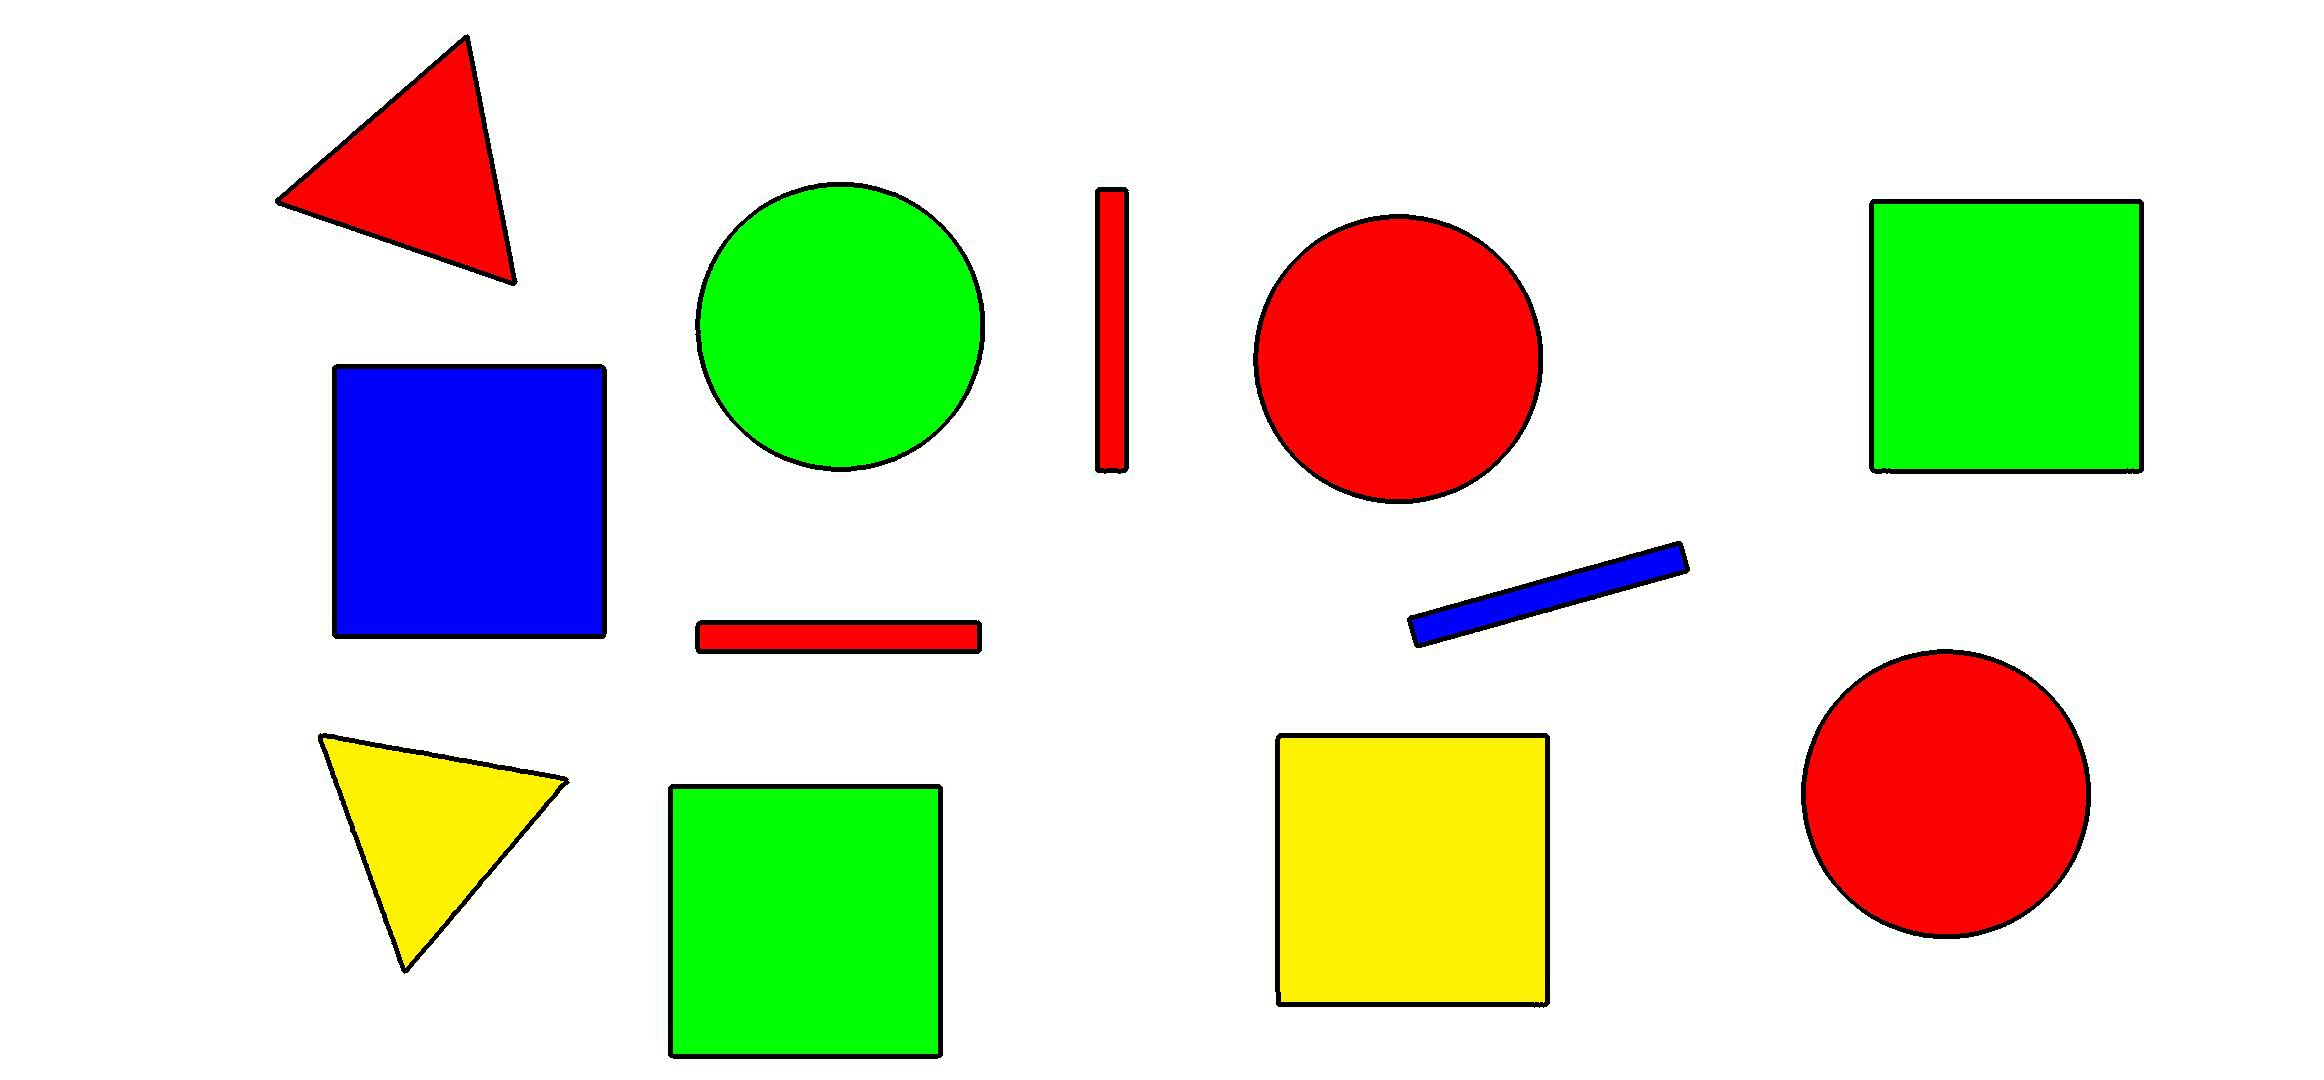

In [7]:
contours, hierarchy = cv2.findContours(Edges,
                      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2_imshow(cv2.drawContours(img, contours, -1, (0, 0, 0), 3))

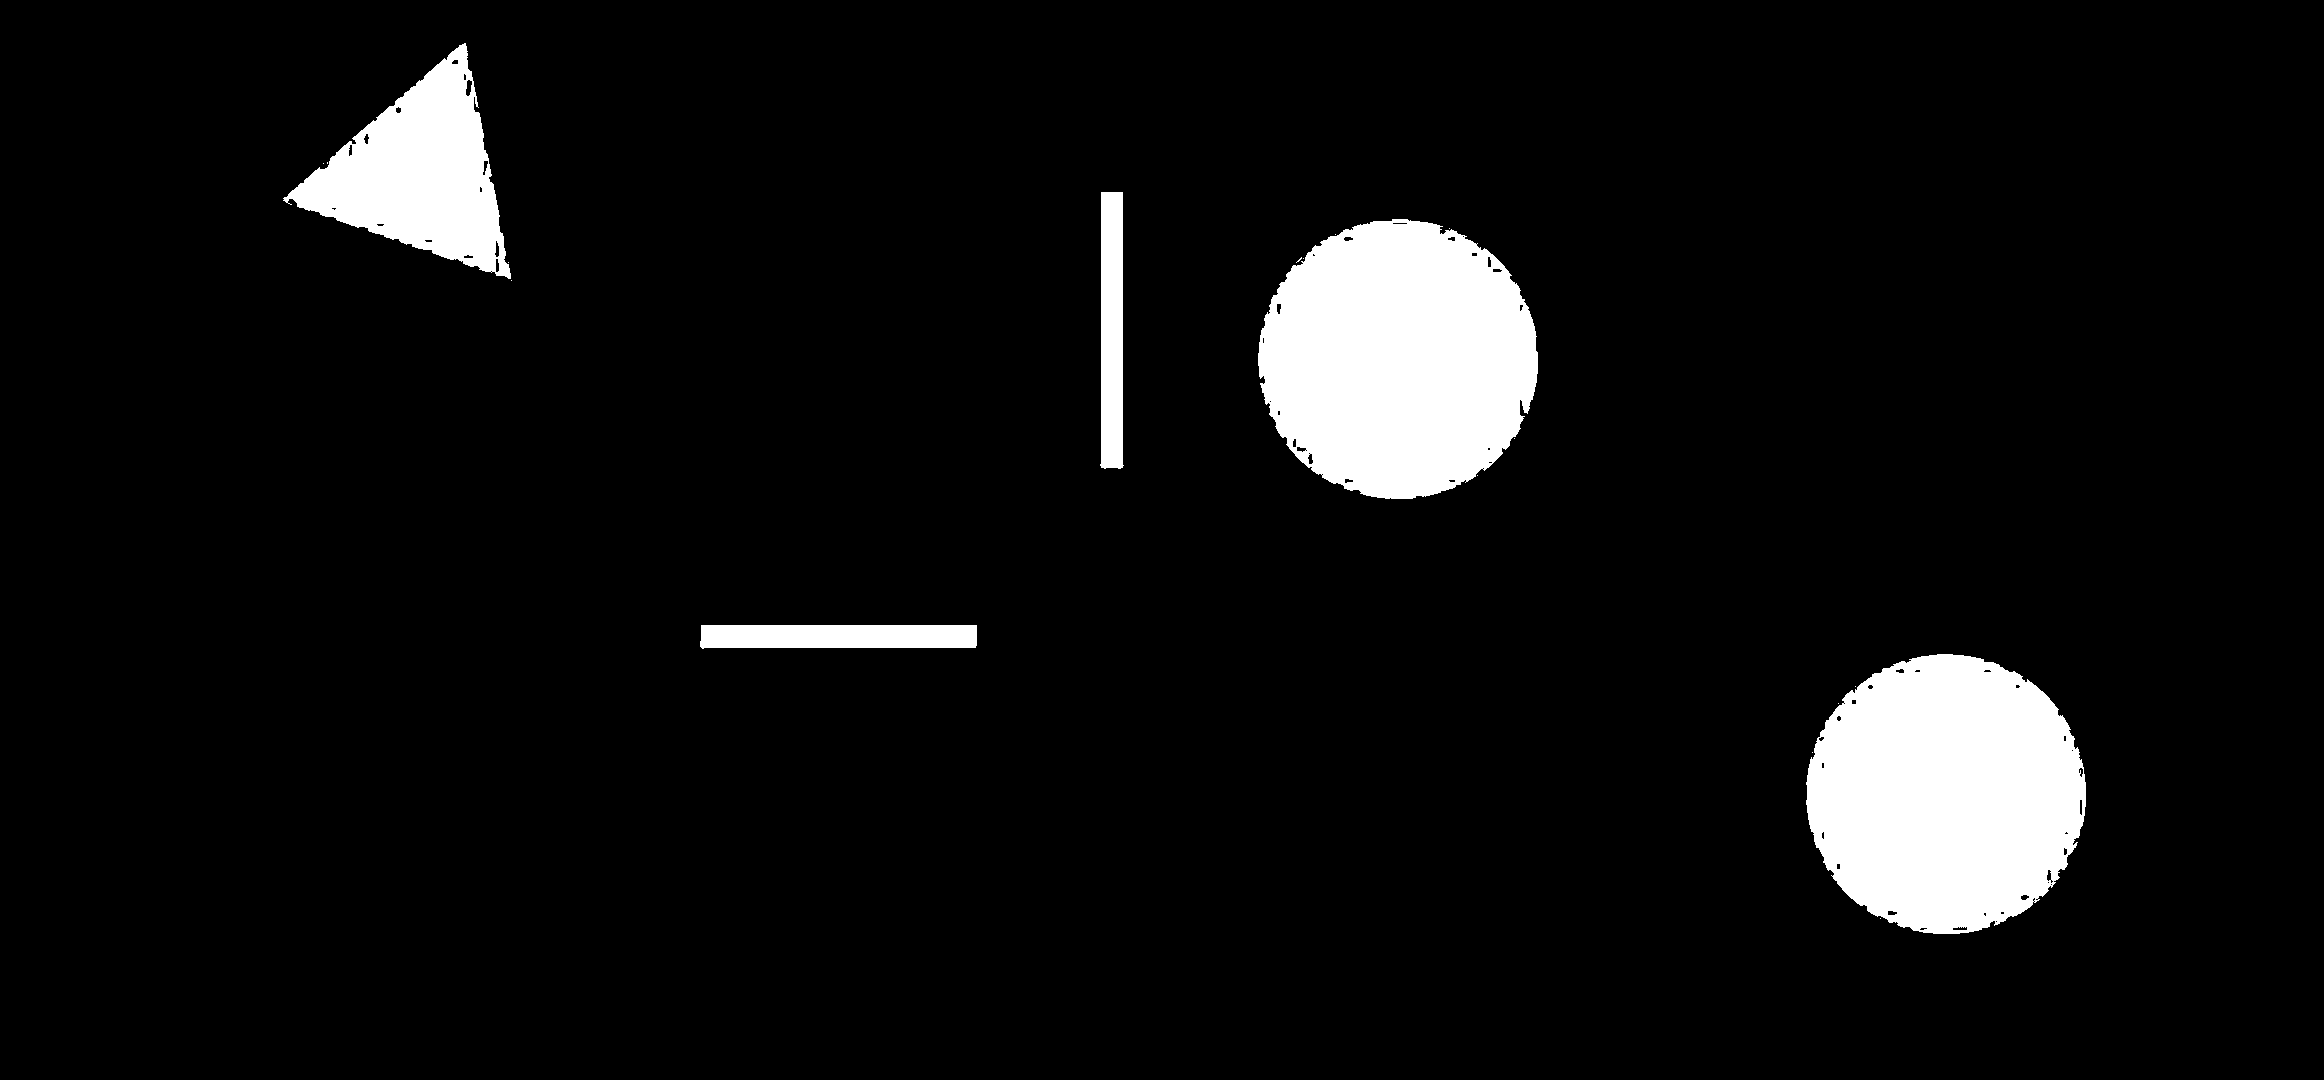

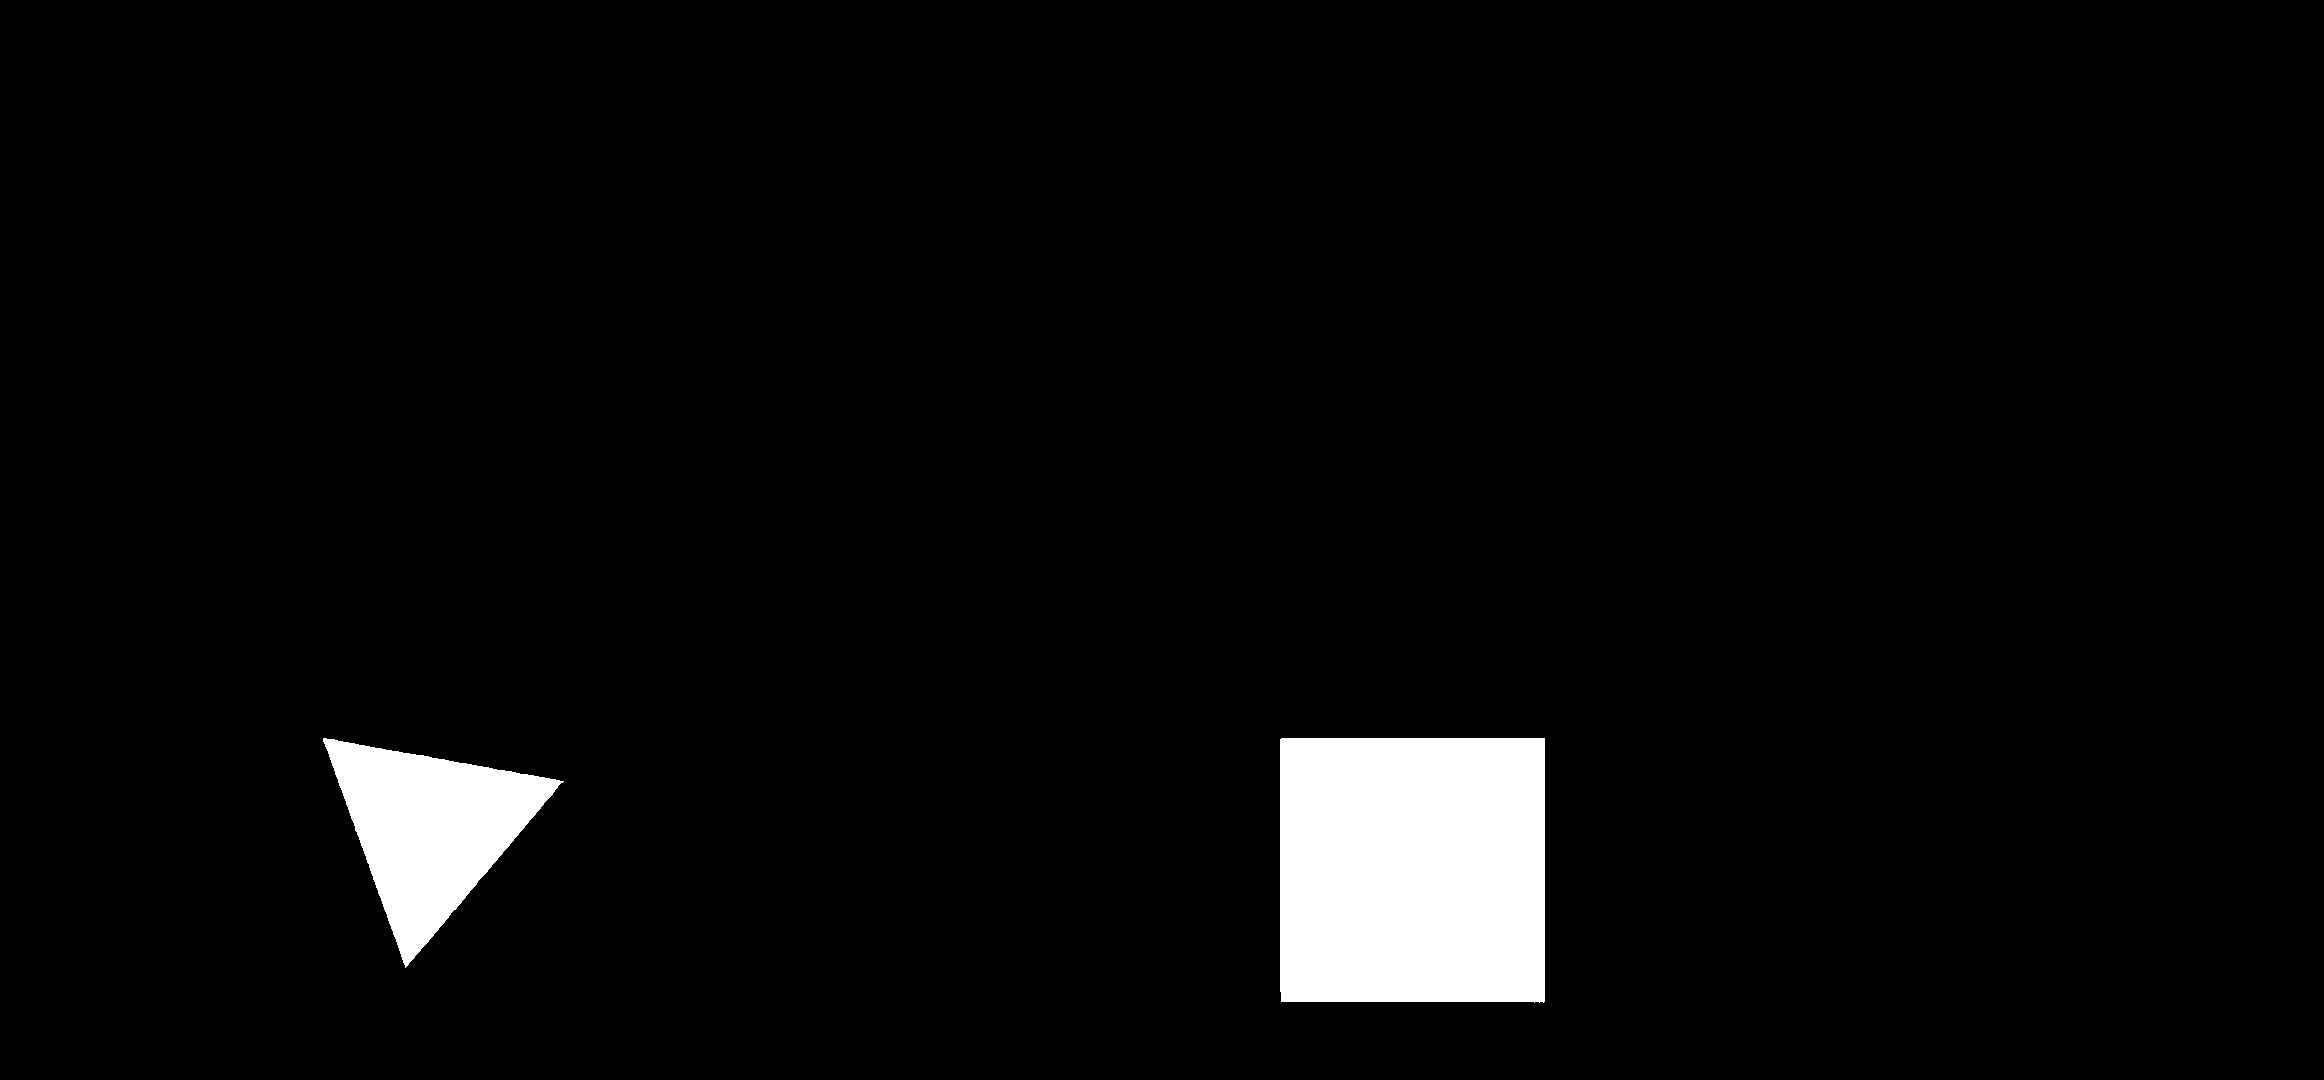

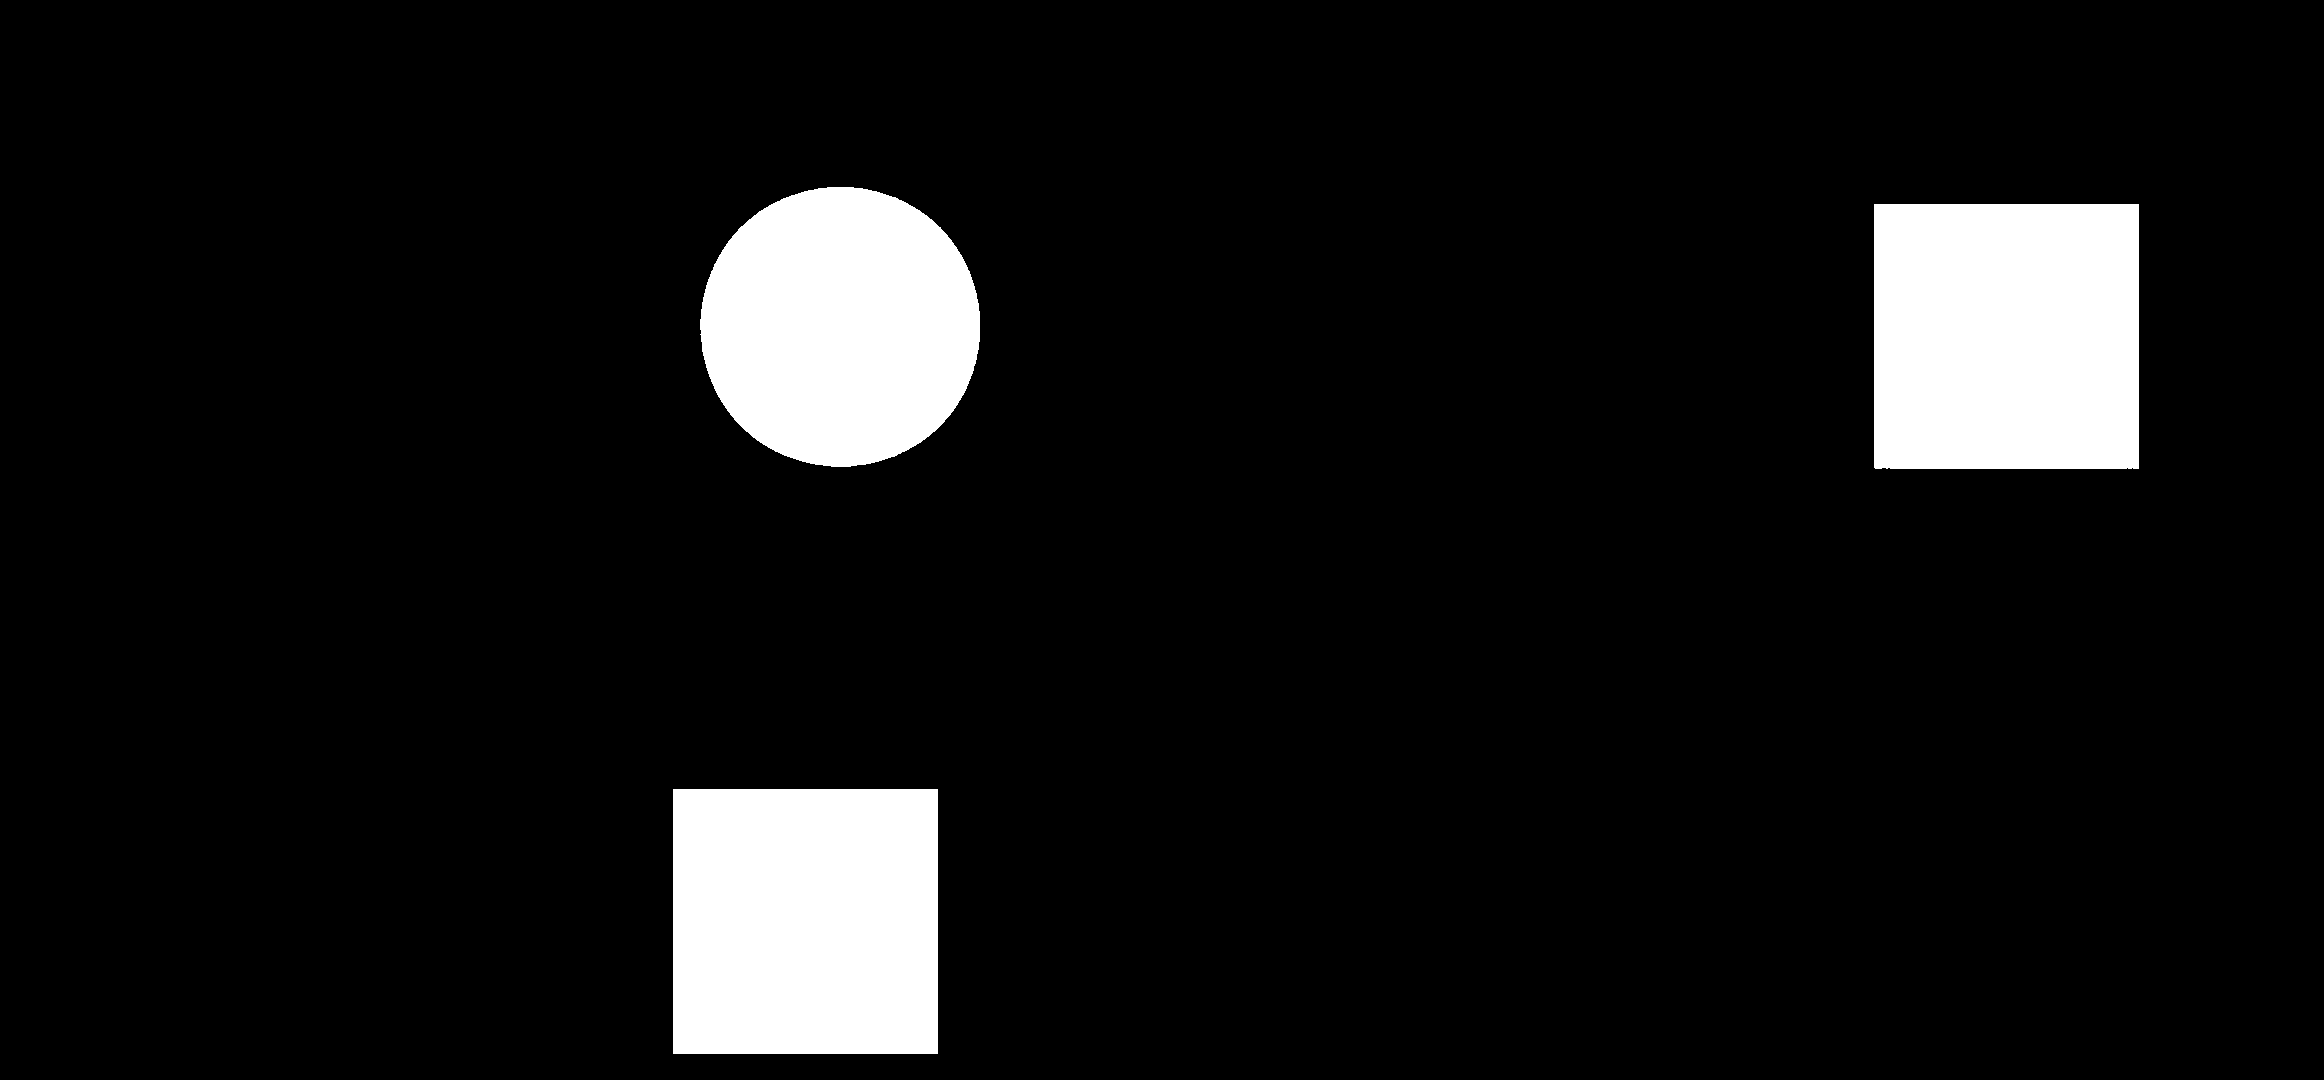

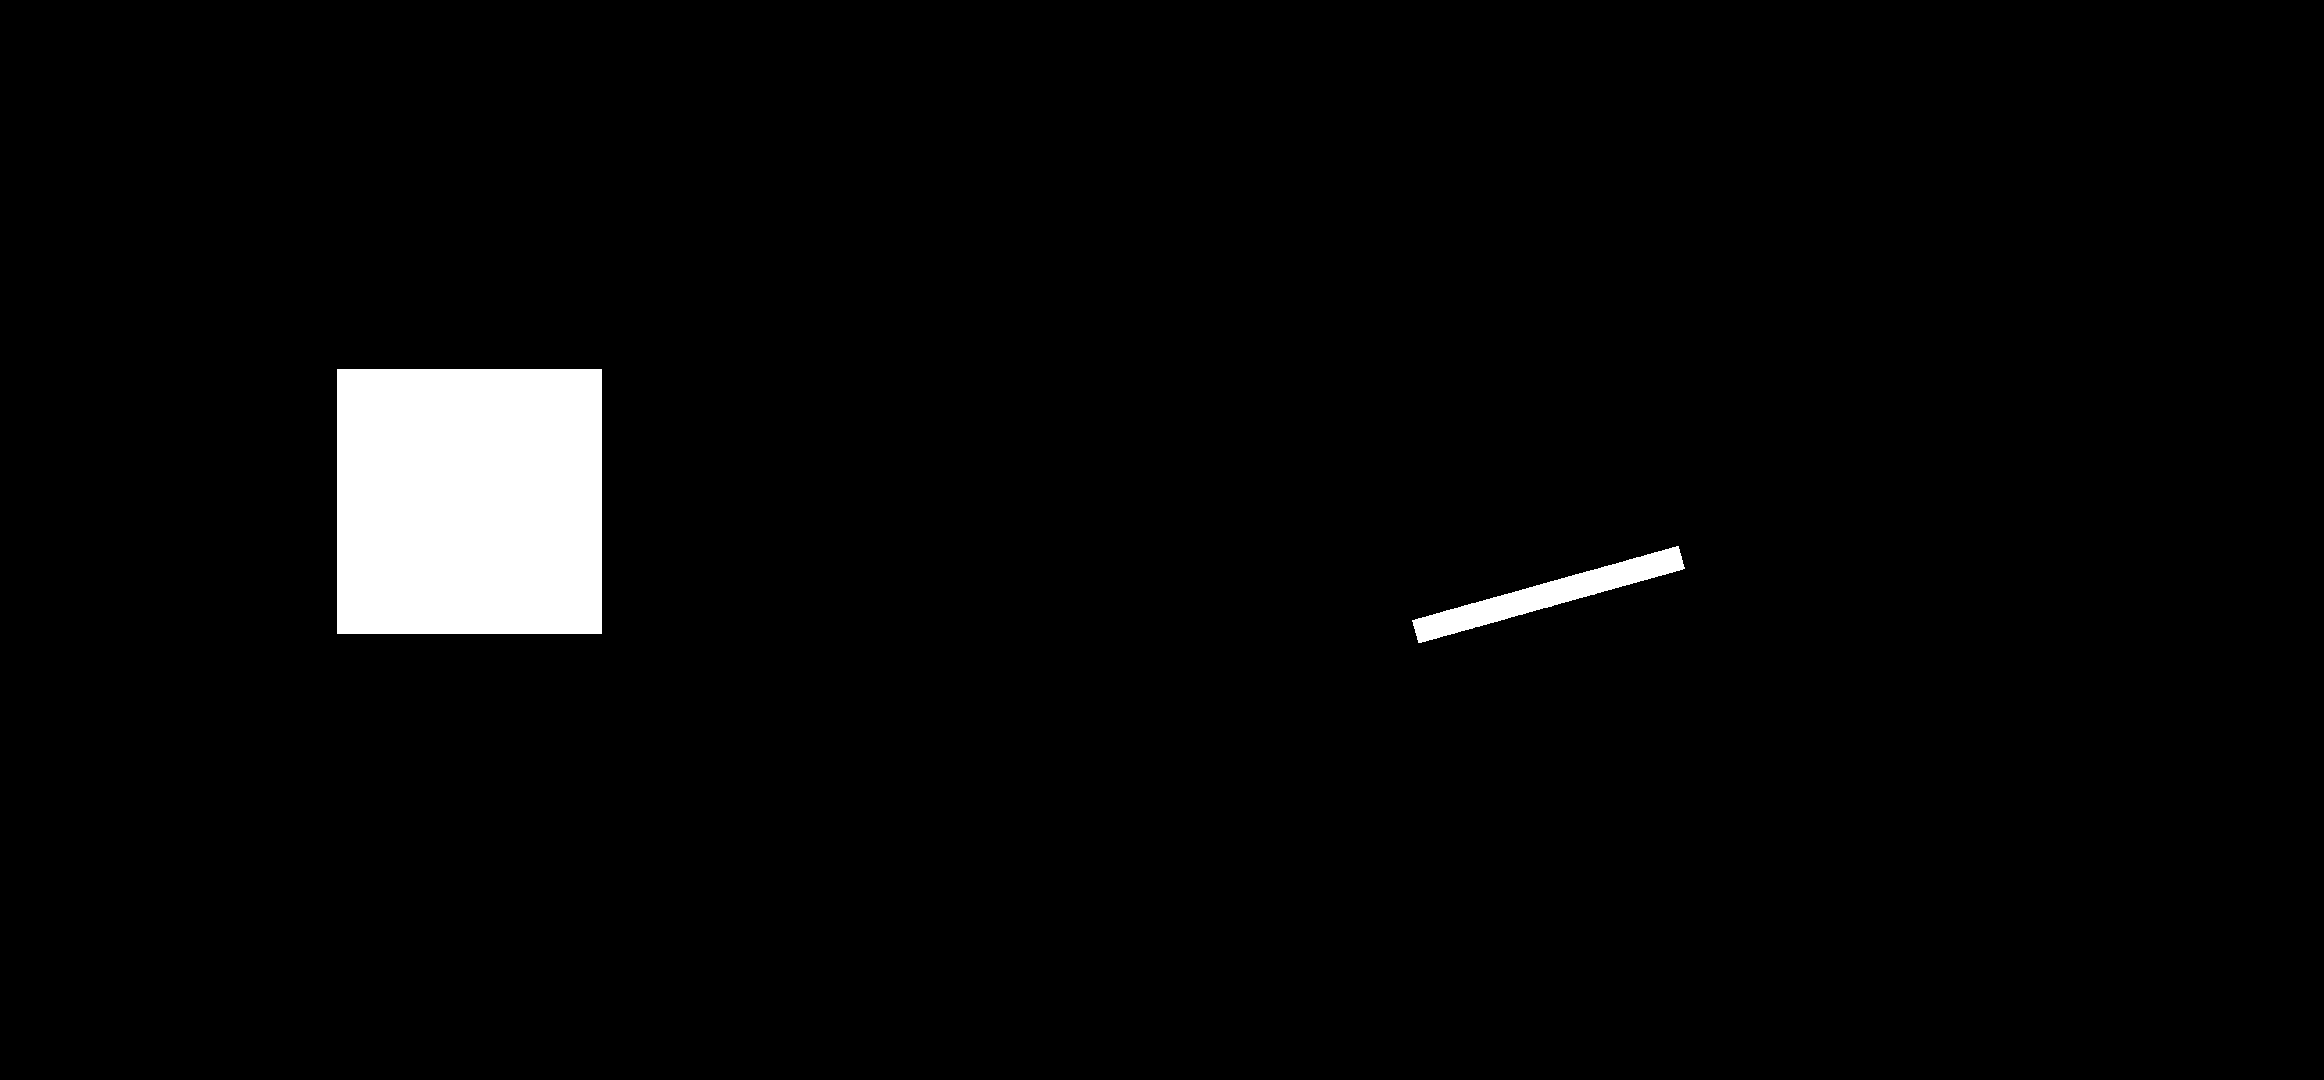

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
colors = {
    'red':[[0, 100, 100], [10, 255, 255]],
    'yellow':[[25, 100, 100], [35, 255, 255]],
    'green':[[50, 100, 100], [70, 255, 255]],
    'blue':[[100, 100, 100], [140, 255, 255]]
}
for key, value in colors.items():
    lower = np.array(value[0])
    upper = np.array(value[1])
    mask = cv2.inRange(hsv, lower, upper)
    cv2_imshow(mask)

Detected green Rectangle at (0, 0)


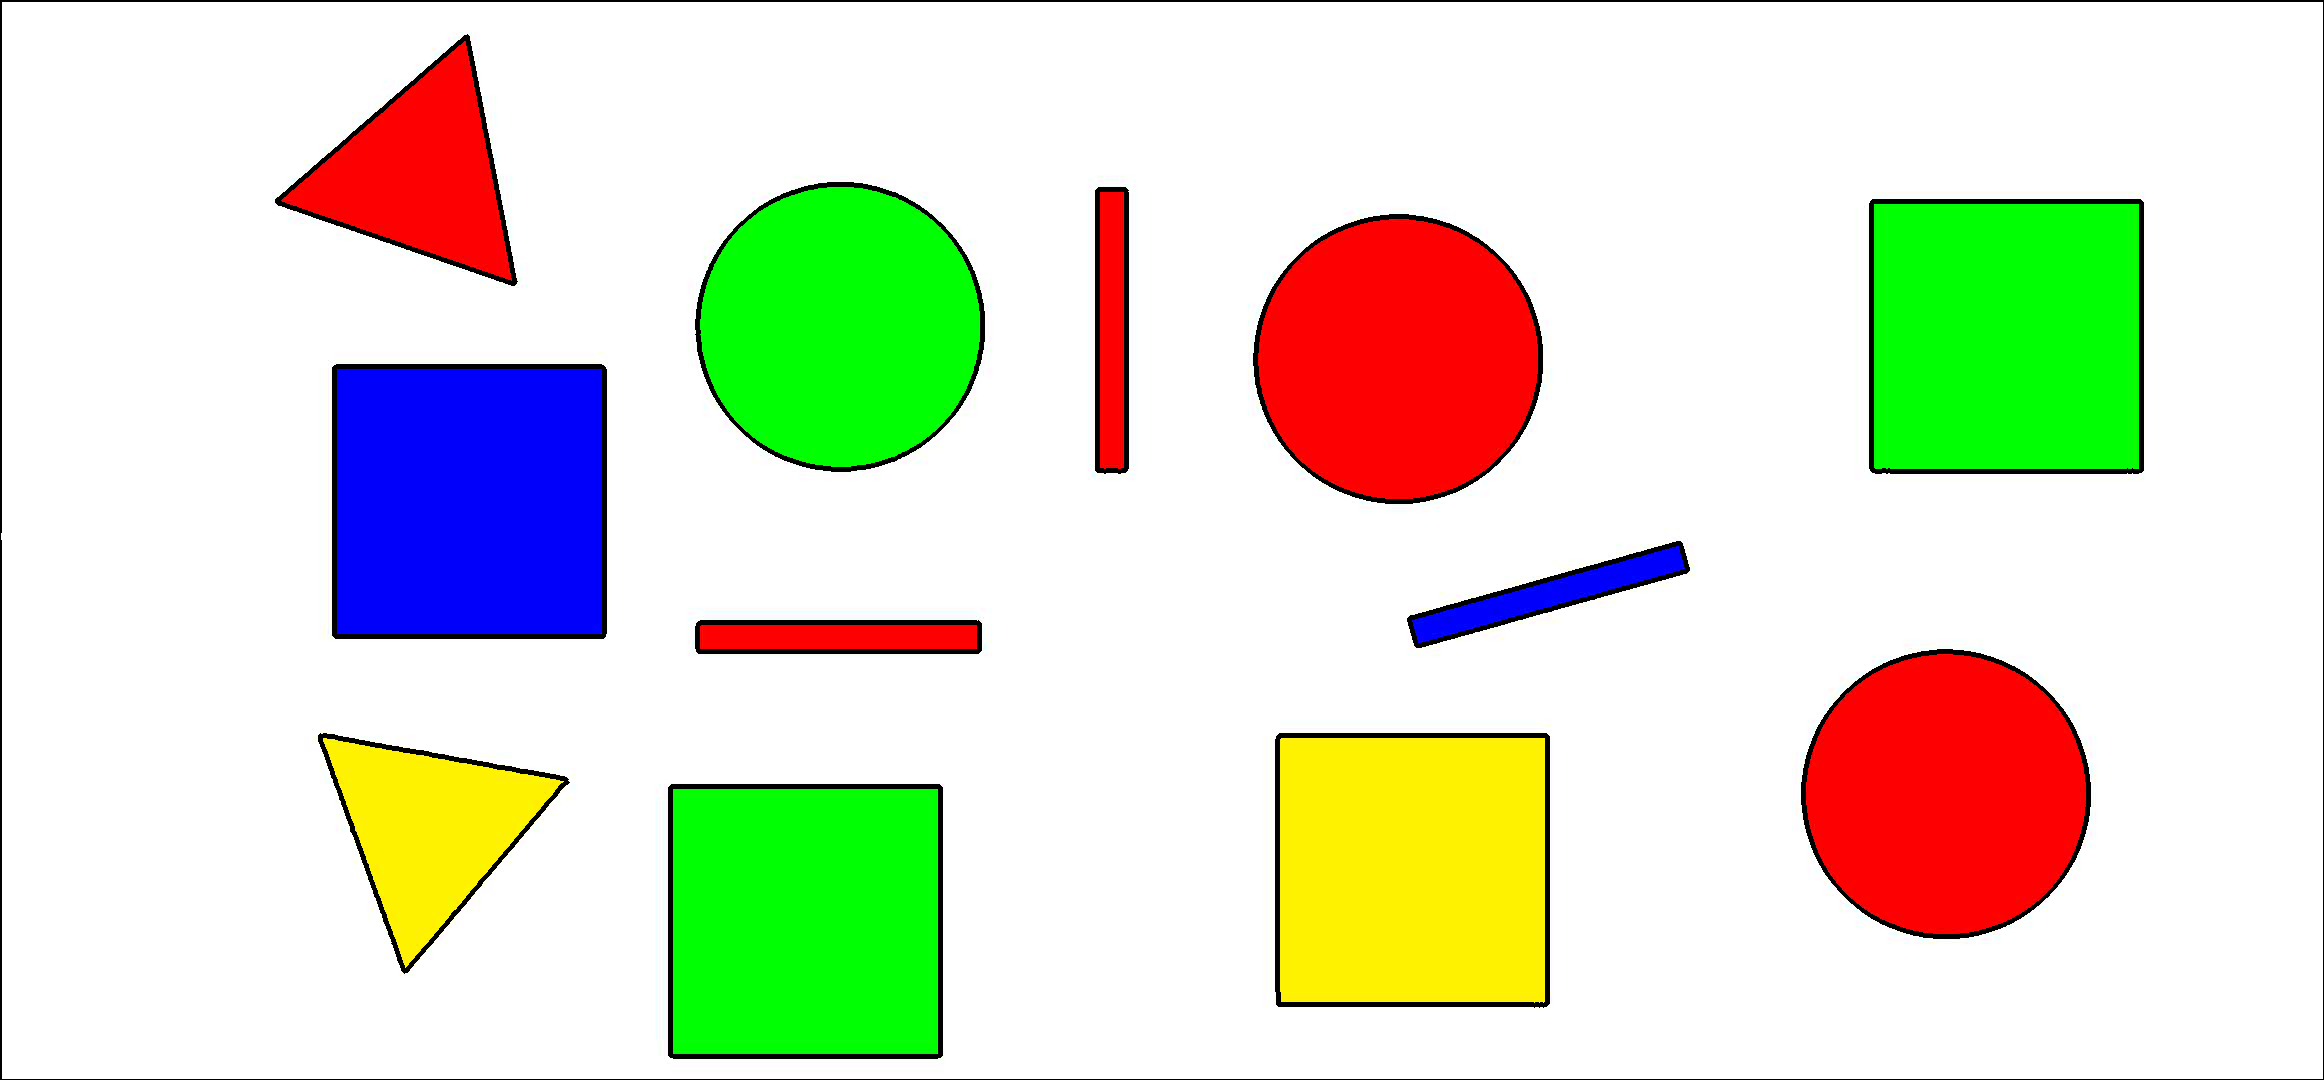

In [14]:
_, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500:
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
        x, y, w, h = cv2.boundingRect(approx)

        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            ar = w / float(h)
            shape = "Square" if 0.95 <= ar <= 1.05 else "Rectangle"
        elif len(approx) > 5:
            shape = "Circle"
        else:
            shape = "Unknown"

        mask = np.zeros(hsv.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [cnt], -1, 255, -1)

        detected_color = "Unknown"
        max_pixels = 0
        for color_name, (lower, upper) in colors.items():
            lower = np.array(lower, dtype=np.uint8)
            upper = np.array(upper, dtype=np.uint8)
            color_mask = cv2.inRange(hsv, lower, upper)
            color_mask = cv2.bitwise_and(color_mask, color_mask, mask=mask)
            count = cv2.countNonZero(color_mask)
            if count > max_pixels:
                max_pixels = count
                detected_color = color_name

        print(f"Detected {detected_color} {shape} at ({x}, {y})")

        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,0), 2)
        final = cv2.putText(img, f"{detected_color} {shape}", (x, y + h//2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
cv2_imshow(img)